# The Sparks Foundation

## Author : Mahak Agrawal
## TSF_TASK-1: Prediction using Supervised ML
## Dataset - http://bit.ly/w-data
### Predict the percentage of students based on the number of study hours.
### What will be the predicted score if a student studies for 9.25 hrs/day?
   


# Importing important libraries of python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

# No null values are present in the dataset

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Plotting scatterplot to check the linear distribution among the variables


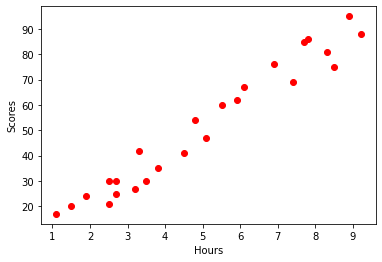

In [11]:
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.scatter(x = df.Hours,y = df.Scores,color = "red",marker = "o")
plt.show()

## Using Sklearn for Linear regression and splitting data to training and test

In [12]:
from sklearn.model_selection import train_test_split


In [16]:
# Splitting training and test data
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values
x_train ,x_test, y_train , y_test= train_test_split(x,y,test_size = 0.2)

In [17]:
x_train

array([[2.5],
       [1.9],
       [8.5],
       [8.9],
       [8.3],
       [2.5],
       [5.9],
       [3.8],
       [6.1],
       [7.7],
       [1.1],
       [5.1],
       [2.7],
       [3.5],
       [3.3],
       [2.7],
       [6.9],
       [7.4],
       [9.2],
       [3.2]])

In [18]:
x_test

array([[7.8],
       [1.5],
       [5.5],
       [4.8],
       [4.5]])

In [19]:
#Training the model
from sklearn.linear_model import LinearRegression


In [21]:
reg = LinearRegression()
reg.fit(x_train , y_train)
y_predict = reg.predict(x_test)

# Linear Regession -> y = mx + c

In [26]:
# getting slope 
slope = reg.coef_
slope

array([9.67550329])

In [27]:
# getting intercept
intercept = reg.intercept_
intercept

2.3419533280938367

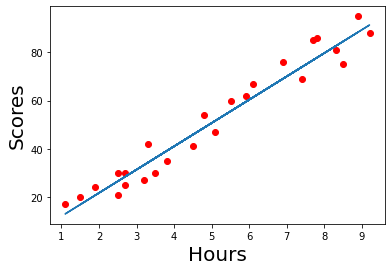

In [30]:
# Now plotting linear regression line
plt.xlabel("Hours",fontsize = 20)
plt.ylabel("Scores",fontsize = 20)
# y = mx + c ,where m =slope and c = intercept
line = slope*x + intercept
plt.scatter(x,y,color = "red",marker = "o")
plt.plot(x,line)
plt.show()


In [31]:
# checking accuarcy of Test score
reg.score(x_test, y_test)

0.9376377592272768

In [33]:
# checking accuracy of Training Score
reg.score(x_train,y_train)

0.954812927850614

In [34]:
# Comparing actual value and predictions
data = pd.DataFrame({"Predicted":y_predict,"Actual":y_test})
data

,Predicted,Actual
0,77.810879,86
1,16.855208,20
2,55.557221,60
3,48.784369,54
4,45.881718,41


# Predicting Score of student who studied 9.25 hr/day

In [36]:
reg.predict([[9.25]])

array([91.84035881])